In [26]:
import pandas as pd
# To open the new figures as inline windows
get_ipython().run_line_magic('matplotlib', 'inline')
# To open the new figures in new separte windows instead as inline windows, uncomment the line below and comment the above line
# get_ipython().run_line_magic('matplotlib', 'qt')

## Reading the input file

In [27]:
df0 = pd.read_csv("../wine.csv")
df0

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


## Deleting the feature "Type"

In [28]:
df = df0.drop(['Type'], axis=1)
df

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [29]:
'''
Plots for univariate analysis of the data

Input: 4 input parameters in total
Output: Returns subplots of various histograms or boxplots

ip:  the input dataframe
SPC: indicates the number of columns in the subplot layout
SPR: indicates the number of rows in the subplot layout
plot_type: write "histogram", "boxplot","scatter plot"

'''
def add_plots(ip,SPC, SPR, plot_type):
    
    import matplotlib.pyplot as plt
    import seaborn as sns
    import numpy as np
    R,C = ip.shape
        
    # Estimating the number of figures
    if divmod(C,SPC*SPR)[1]==0:
        figs = divmod(C,SPC*SPR)[0]
    else:
        figs = divmod(C,SPC*SPR)[0] + 1
            
    for x in range(figs):
        plt.figure().suptitle(plot_type, fontsize=20)
        # Uncomment the below line if the plots happen in new separate windows instead of inline windows
        #plt.get_current_fig_manager().window.showMaximized() 
        for y in range(SPC*SPR):
            if C >(x*SPC*SPR)+y: 
                plt.subplot(SPC,SPR,y+1)                
                plt.grid(b=True, which='major', color='#666666', linestyle='-', alpha=0.2)
                plt.xlabel(ip.columns[(x*SPC*SPR)+y],fontweight='bold')
                plt.ylabel('count') 
                if plot_type == "Histogram distribution":
                    plt.hist(ip.iloc[:,(x*SPC*SPR)+y],edgecolor='black')
                elif plot_type == "Scatter distribution":
                    plt.scatter(ip.index,ip.iloc[:,(x*SPC*SPR)+y],marker=".")
                    plt.ylabel(ip.columns[(x*SPC*SPR)+y],fontweight='bold')
                    plt.xlabel('Index',fontweight='normal')
                elif plot_type == "Boxplot distribution":
                    if ip.dtypes[ip.columns[(x*SPC*SPR)+y]]!=np.object:
                        sns.boxplot(ip.iloc[:,(x*SPC*SPR)+y])

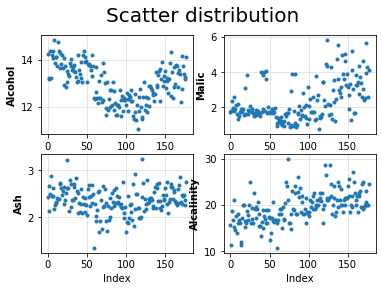

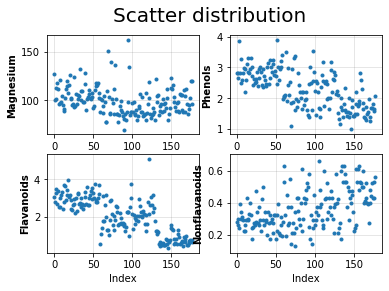

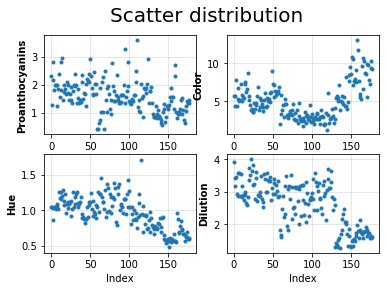

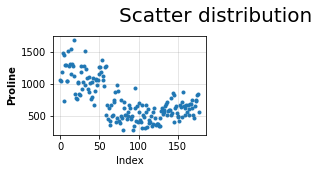

In [30]:
add_plots(df, 2, 2, "Scatter distribution")

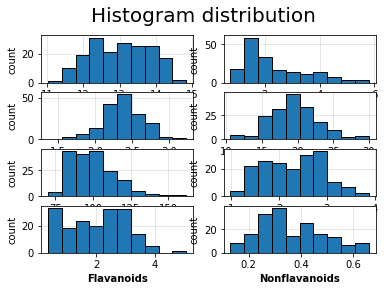

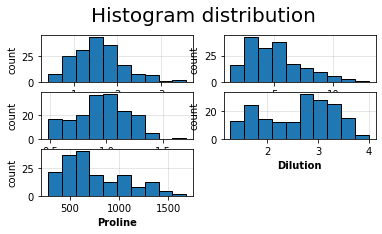

In [31]:
add_plots(df, 4, 2, "Histogram distribution")

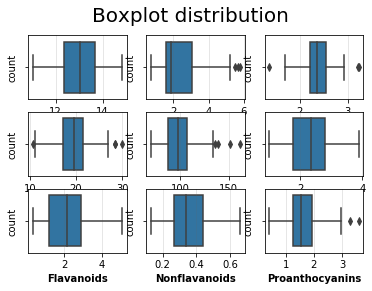

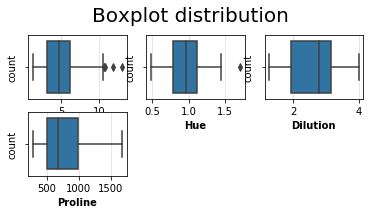

In [24]:
add_plots(df, 3, 3, "Boxplot distribution")